# Feature Scaling

[Himanshu Goswami](https://github.com/HimGos) - September 2022

Feature scaling refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. For example, 0 to 1.

#### **Feature Scaling Techniques**
> - **Normalization** is a special case of **MinMaxScaler**
>   - **Normalization**: Converts values between 0-1. `(values - values.min())/(values.max() - values.min())`
>   - **MinMaxScaler**: Between any values

> - **Standardization** (StandardScaler from sklearn)
>   - Mean: 0, StdDev: 1 `(values - values.mean())/values.std()`
>   - Less sensitive to outliers

> - **MaxAbsScaler**
>   - This Scaler Works Little Different From The Other Two.
>   - Works in three-steps :-
>       - Takes the absolute value of each value in the column.
>       - Find the max value of the column.
>       - Divides the max value with each value in the column.

> - **Robust Scaler**
>   - NOT SENSITIVE to outliers!
>   - It uses IQR(Inter Quartile Range) to scales the data.
>       - It removes the median from the data.
>       - Scales the data using IQR


In [45]:
# Importing Required libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [46]:
# Loading Dataset

df = pd.read_csv('data/Travel.csv')

# A subset of the description

df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [47]:
# We will first clean the data in a simple way.

df_clean = df.dropna()
df_clean = df_clean.drop(['CustomerID'], axis=1)


# Then we will split the data into train and test.

from sklearn.model_selection import train_test_split

X = df_clean.select_dtypes(include=np.number)
y = df_clean['ProdTaken']
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

- Then let’s make a box plot to see the problem with the data.

<AxesSubplot:>

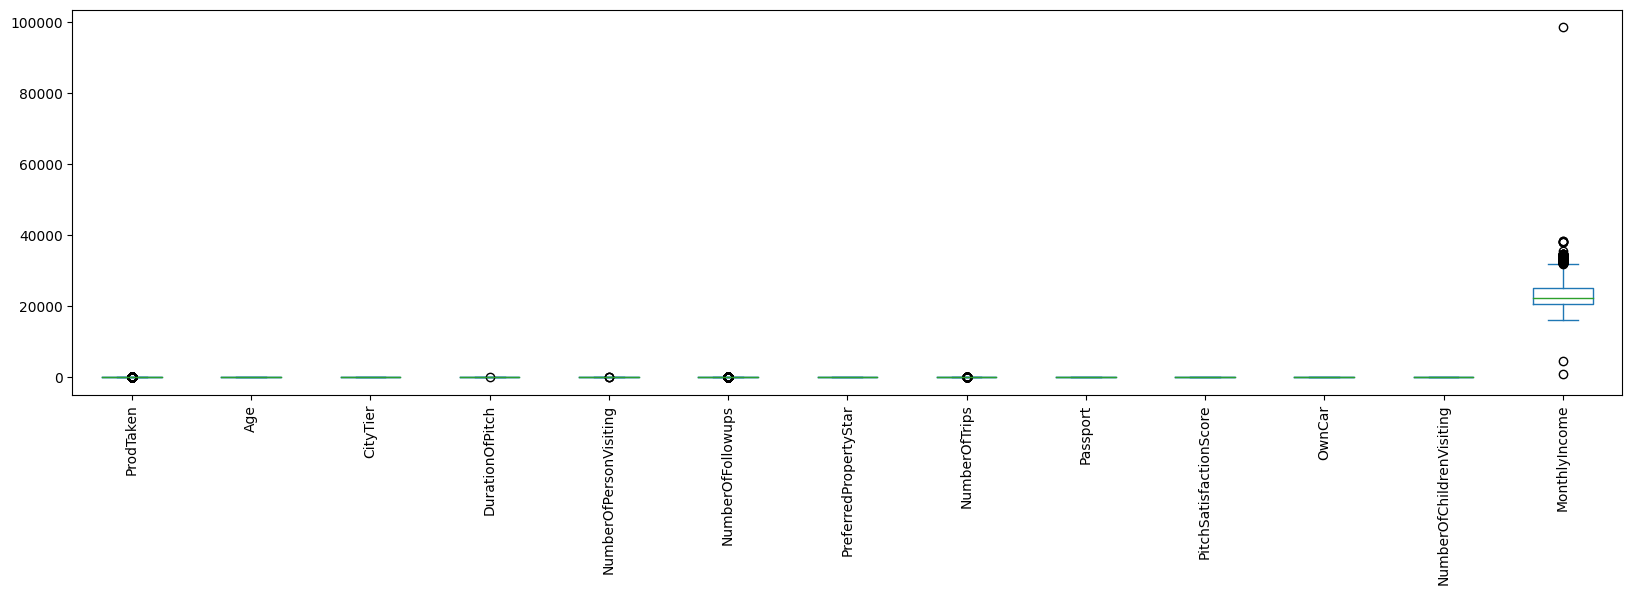

In [48]:
X_train.plot.box(figsize=(20,5), rot=90)

The problem is that the data is in the same ranges – which makes it difficult for distance based Machine Learning models.

We need to deal with that.

-------------------------------------------------------------------

# Scaling with splitting data into test and train

## Normalization / MinMax Scaler


> Normalization transforms data into the same range.
>   - MinMaxScaler Transform features by scaling each feature to a given range.
>   - MinMaxScaler().fit(X_train) is used to create a scaler.
>       - Notice: We only do it on training data

> Min Max Scaler is one of the simpler scalers to understand and implement. It Scales down all the values between 0 to 1. The Maximum Value in the column is given the value 1, and the minimum value in the column is given the value 0, and all the except values are given values between 0 to 1.

<AxesSubplot:>

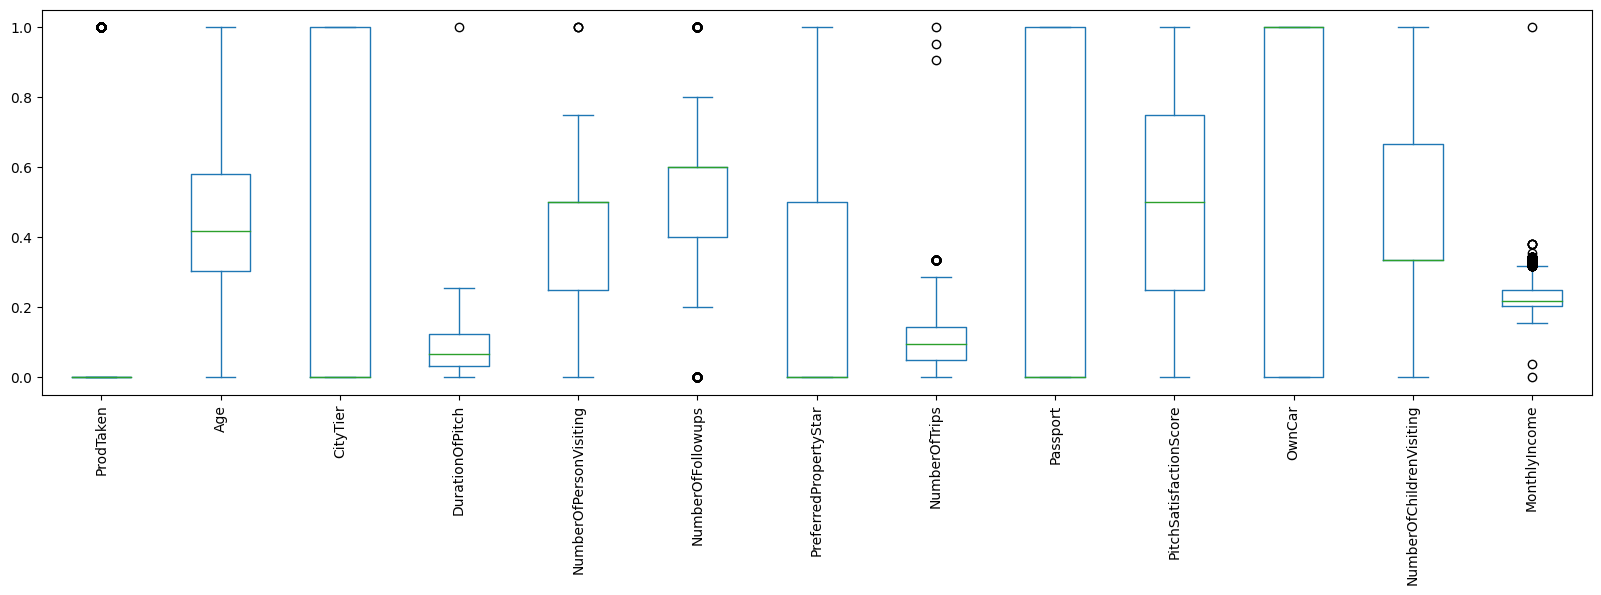

In [49]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

> #### Observation :-
> - As we see here then all the data is put into the same range form 0 to 1.
> - This has the challenge that we see how the outliers might dominate the picture.

## Standardization

> - Standard Scaler is also one of the most used and simpler to understand scaler.
> - Rather than scaling values between 0 to 1, it scales the values in a way that mean is 0 and variance is 1.

<AxesSubplot:>

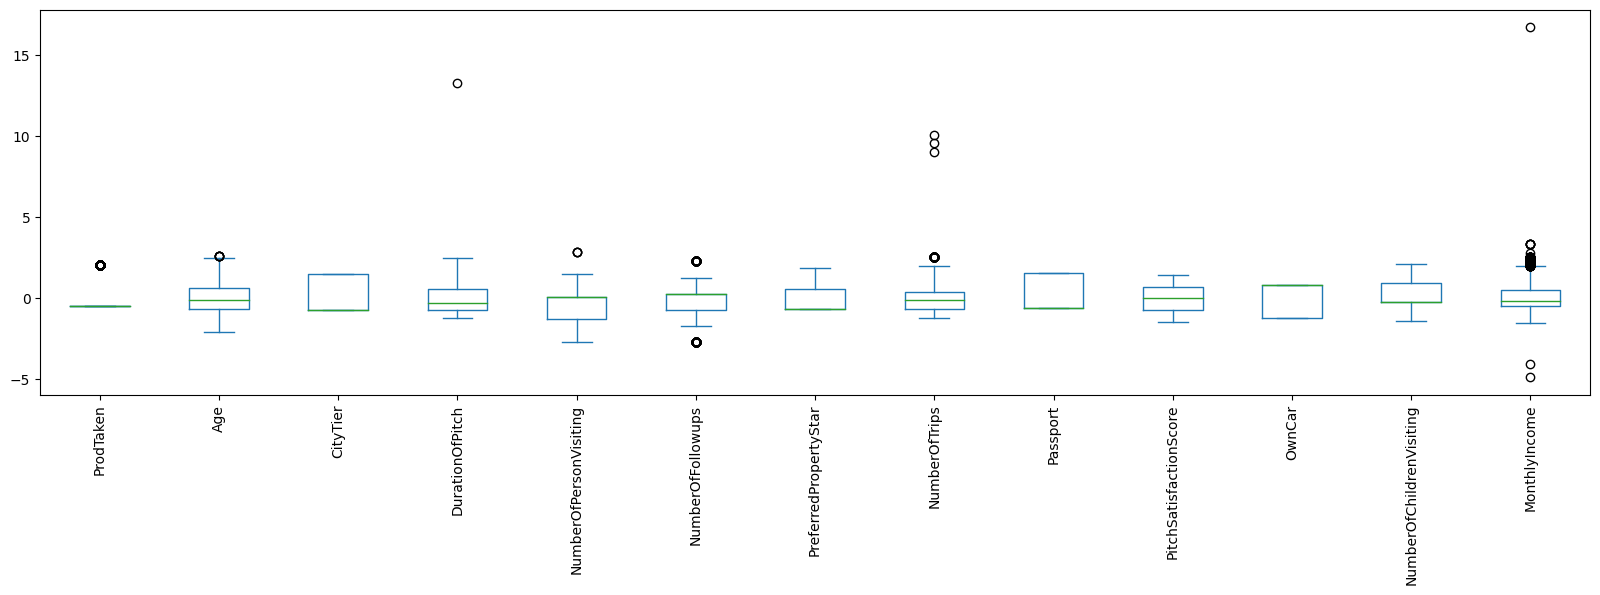

In [50]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

pd.DataFrame(X_train_stand, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

-------------------------------------------------

# Scaling without splitting data into test and train

## Normalization

In [51]:
### Defining Scaler ###
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### MinMax Scaling ###
col_names = df.select_dtypes(include=np.number).columns.tolist()
nor = df[col_names]
nor[col_names] = scaler.fit_transform(nor.values)

# Checking out data

nor.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,0.000000,1.0,0.534884,1.0,0.008197,0.50,0.4,0.0,0.000000,1.0,0.25,1.0,0.000000,0.204683
1,0.000205,0.0,0.720930,0.0,0.073770,0.50,0.6,0.5,0.047619,0.0,0.50,1.0,0.666667,0.195848
2,0.000409,1.0,0.441860,0.0,0.024590,0.50,0.6,0.0,0.285714,1.0,0.50,0.0,0.000000,0.164725
3,0.000614,0.0,0.348837,0.0,0.032787,0.25,0.4,0.0,0.047619,1.0,1.00,1.0,0.333333,0.173110
4,0.000818,0.0,NaN,0.0,0.024590,0.25,0.4,0.5,0.000000,0.0,1.00,1.0,0.000000,0.178832


<AxesSubplot:>

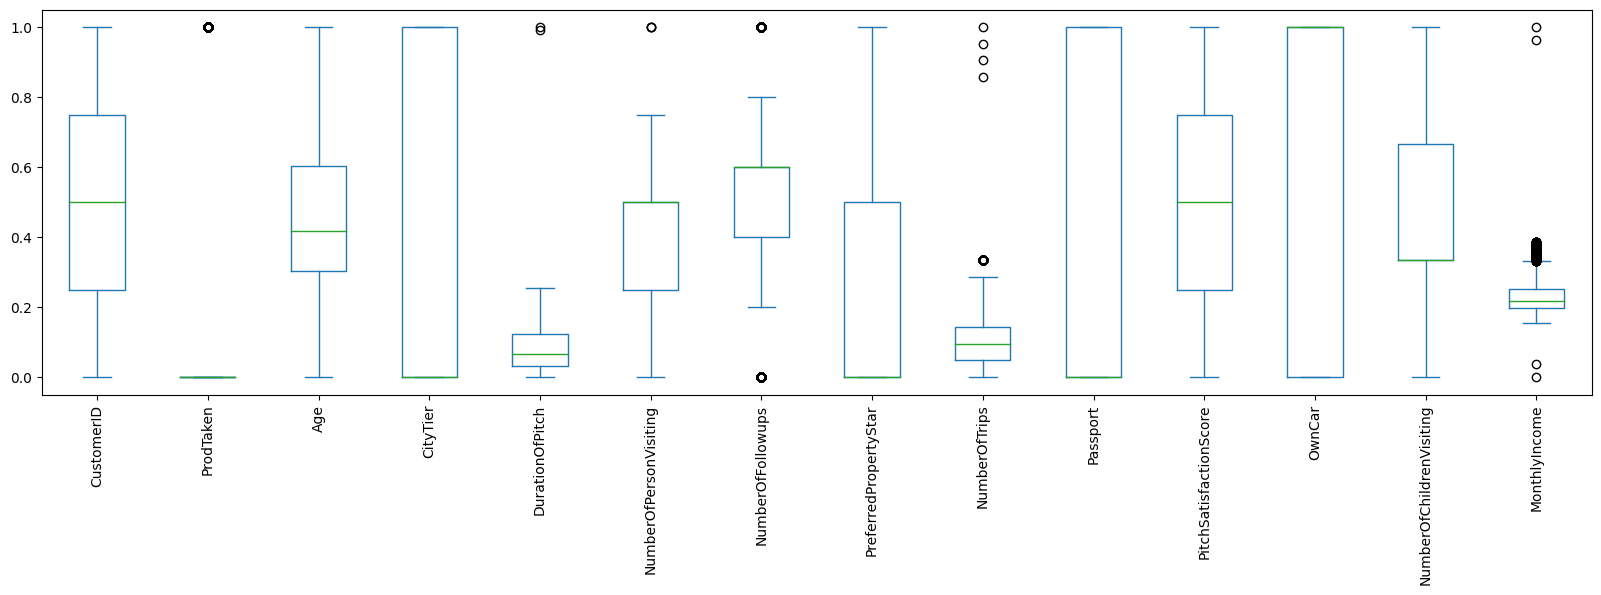

In [52]:
nor.plot.box(figsize=(20,5), rot=90)

## Standardization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_names = df.select_dtypes(include=np.number).columns.tolist()
stan = df[col_names]
stan[col_names] = scaler.fit_transform(stan.values)

# Checking how the values has changed
stan.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,-1.731696,2.076787,0.362597,1.468369,-1.114115,0.130966,-0.706745,-0.728183,-1.209699,1.561221,-0.789477,0.782392,-1.384128,-0.488252
1,-1.730988,-0.481513,1.221391,-0.713871,-0.175007,0.130966,0.290855,0.525065,-0.668814,-0.640524,-0.057226,0.782392,0.947493,-0.648657
2,-1.730279,2.076787,-0.066800,-0.713871,-0.879338,0.130966,0.290855,-0.728183,2.035607,1.561221,-0.057226,-1.278132,-1.384128,-1.213700
3,-1.729570,-0.481513,-0.496197,-0.713871,-0.761949,-1.248694,-0.706745,-0.728183,-0.668814,1.561221,1.407276,0.782392,-0.218318,-1.061473
4,-1.728862,-0.481513,NaN,-0.713871,-0.879338,-1.248694,-0.706745,0.525065,-1.209699,-0.640524,1.407276,0.782392,-1.384128,-0.957572


<AxesSubplot:>

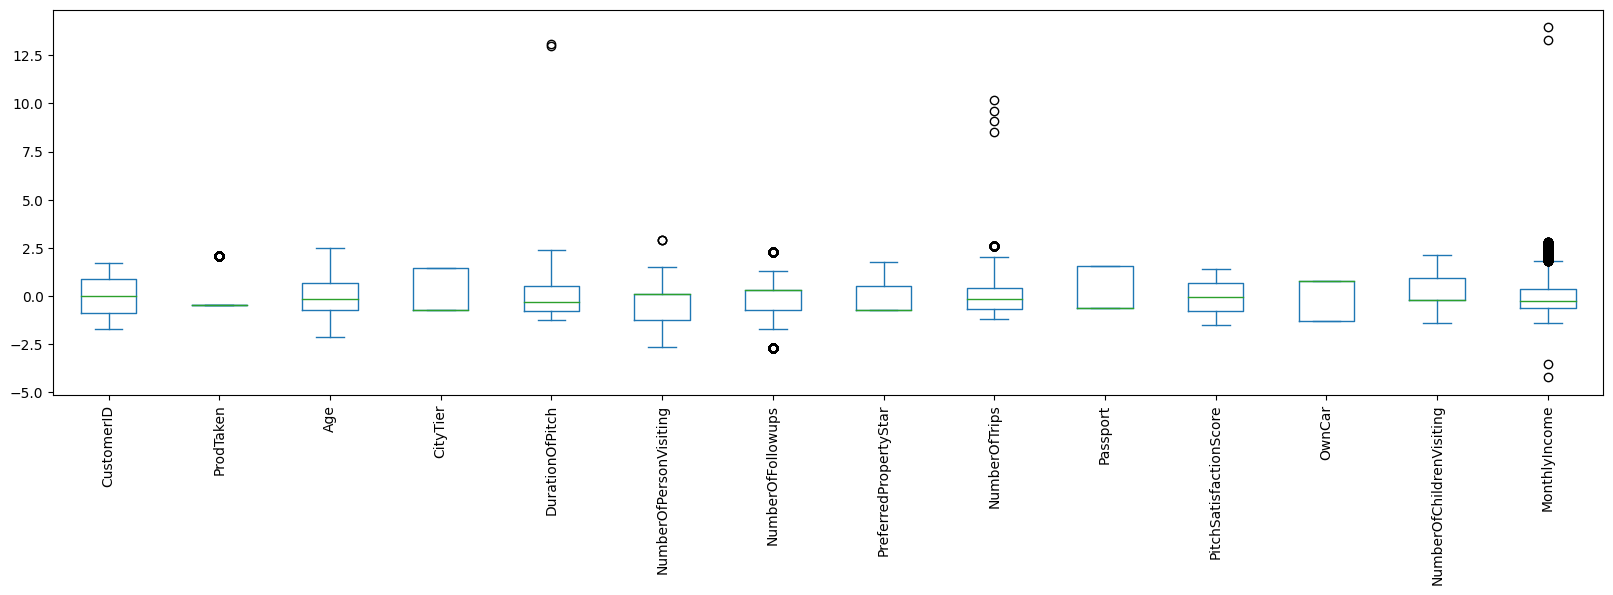

In [54]:
# Plotting the new values on a boxplot

stan.plot.box(figsize=(20,5), rot=90)

## MaxAbsScaler

In [55]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
col_names = df.select_dtypes(include=np.number).columns.tolist()
maxabs = df[col_names]
maxabs[col_names] = scaler.fit_transform(maxabs.values)

# Checking how data looks like with new values

maxabs.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,0.976148,1.0,0.672131,1.000000,0.047244,0.6,0.500000,0.6,0.045455,1.0,0.4,1.0,0.000000,0.212742
1,0.976153,0.0,0.803279,0.333333,0.110236,0.6,0.666667,0.8,0.090909,0.0,0.6,1.0,0.666667,0.203997
2,0.976158,1.0,0.606557,0.333333,0.062992,0.6,0.666667,0.6,0.318182,1.0,0.6,0.0,0.000000,0.173190
3,0.976162,0.0,0.540984,0.333333,0.070866,0.4,0.500000,0.6,0.090909,1.0,1.0,1.0,0.333333,0.181489
4,0.976167,0.0,NaN,0.333333,0.062992,0.4,0.500000,0.8,0.045455,0.0,1.0,1.0,0.000000,0.187154


<AxesSubplot:>

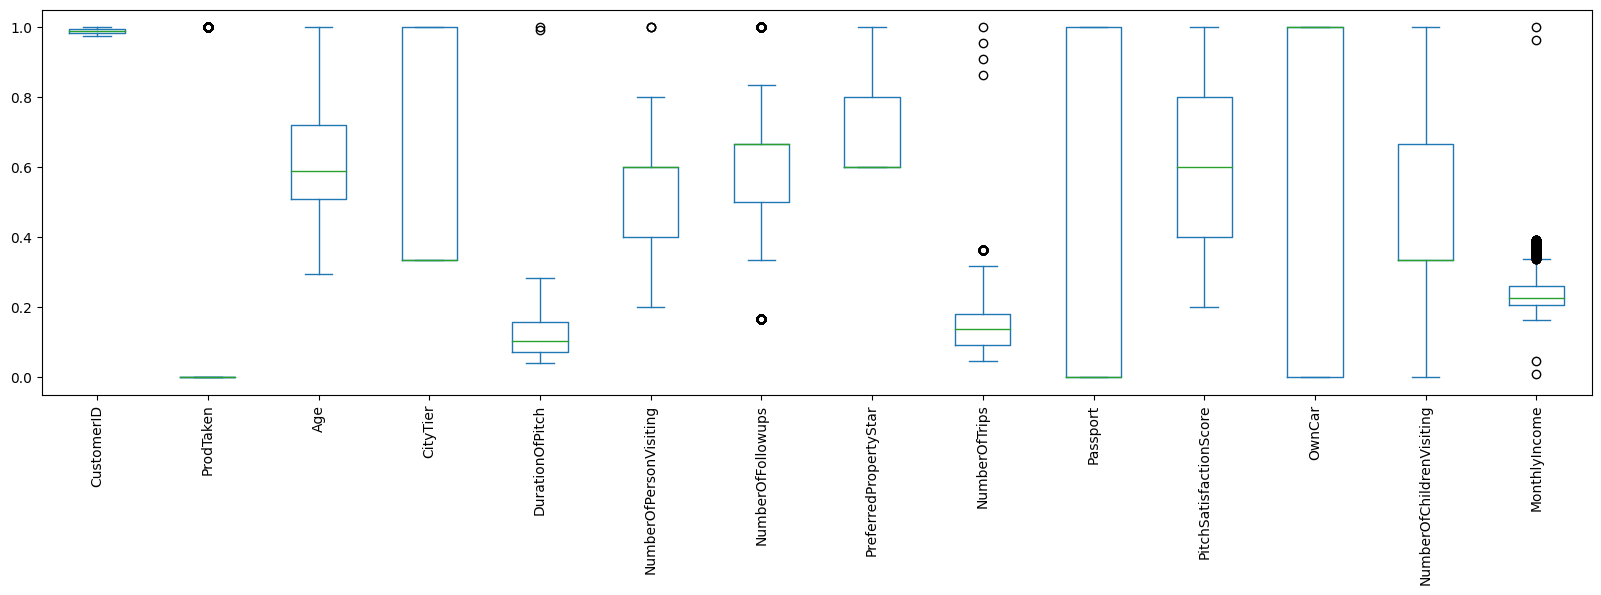

In [56]:
# Plotting the new values on a boxplot

maxabs.plot.box(figsize=(20,5), rot=90)

#### Now We have Seen three Scalers, but all of them use to mean max or min values of the column to scale the data.

#### These values are sensitive to outliers, and if there are many outliers in the dataset, then these values can be influenced by outliers easily. A robust Scaler is a kind of scaler that is not sensitive to outliers.

## Robust Scaler

> **Formula:**

> IQR = Q3-Q1

> X_scaled = (X-Q1)/(Q3-Q1)

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
col_names = df.select_dtypes(include=np.number).columns.tolist()
rob = df[col_names]
rob[col_names] = scaler.fit_transform(rob.values)

# Checking how our new values looking like

rob.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,-1.000000,1.0,0.384615,1.0,-0.636364,0.0,-1.0,0.0,-1.0,1.0,-0.5,0.0,-1.0,-0.259139
1,-0.999591,0.0,1.000000,0.0,0.090909,0.0,0.0,1.0,-0.5,0.0,0.0,0.0,1.0,-0.424306
2,-0.999182,1.0,0.076923,0.0,-0.454545,0.0,0.0,0.0,2.0,1.0,0.0,-1.0,-1.0,-1.006124
3,-0.998772,0.0,-0.230769,0.0,-0.363636,-1.0,-1.0,0.0,-0.5,1.0,1.0,0.0,0.0,-0.849378
4,-0.998363,0.0,NaN,0.0,-0.454545,-1.0,-1.0,1.0,-1.0,0.0,1.0,0.0,-1.0,-0.742392


<AxesSubplot:>

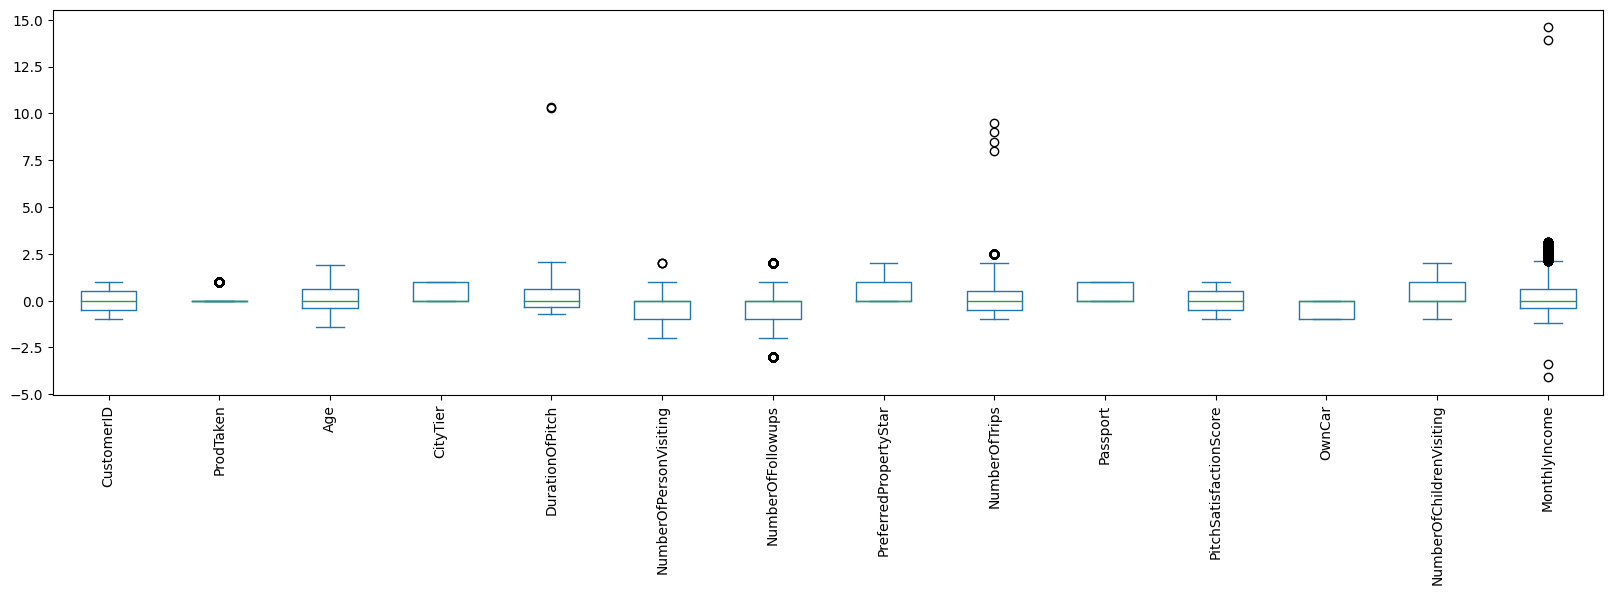

In [58]:
# Plotting the new values on a boxplot

rob.plot.box(figsize=(20,5), rot=90)

-------------------------------------------------------------------

# Conclusion

In all above techniques we noticed that some scalers were sensitive to outliers, while others were robust.

Each feature scaling technique has its own characteristics which we can leverage to improve our model.

However, just like other steps in building a predictive model, choosing the right scaler is also a trial and error process, and there is no single best scaler that works every time.